In [1]:
import pandas as pd

In [2]:
data_january = pd.read_csv("./data/1januarynew.csv.tar.gz", compression='gzip', header=0, sep=',')


In [3]:
data_january = data_january.iloc[0::8,:]

In [4]:
columns = list(data_january.columns.values)
columns[0] = 'pickup_datetime'
data_january.columns = columns

In [66]:
data_january.dropna(inplace = True)
data_january.reset_index(drop=True, inplace=True)

In [5]:
import dateutil

In [128]:
data_january['pickup_datetime'] =  pd.to_datetime(data_january['pickup_datetime'])
data_january['dropoff_datetime'] =  pd.to_datetime(data_january['dropoff_datetime'])

In [129]:
data_january['dummy'] = 1
groups_pickup_neighborhood = data_january.groupby('pickup_neighborhood').agg({'dummy': 'sum'})
groups_pickup_neighborhood.sort_values('dummy', ascending=False, inplace=True)

In [130]:
# groups_dropoff_neighborhood['suma'] = data_january['dummy'].groupby(data_january['dropoff_neighborhood']).transform('sum')
groups_dropoff_neighborhood = data_january.groupby('dropoff_neighborhood').agg({'dummy': 'sum'})
groups_dropoff_neighborhood.sort_values('dummy', ascending=False, inplace=True)

In [131]:
import matplotlib.pyplot as plt
import numpy as np

## Cuales son los Neighborhoods con mayor pickups?

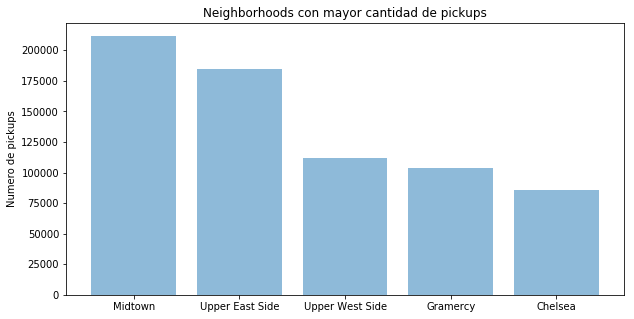

In [132]:
top_cities_pickup_index = list(groups_pickup_neighborhood.index)
top_cities_pickup_values = np.concatenate( groups_pickup_neighborhood.values, axis=0).tolist()
top_cities_pickup_index = top_cities_pickup_index[:5]
top_cities_pickup_values = top_cities_pickup_values[:5]
x = np.arange(len(top_cities_pickup_index))
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(x, top_cities_pickup_values, align='center', alpha=0.5)
plt.xticks(x, top_cities_pickup_index)
plt.ylabel('Numero de pickups')
plt.title('Neighborhoods con mayor cantidad de pickups')
plt.show()

## Cuales son los Neighborhoods con mayor dropoffs?

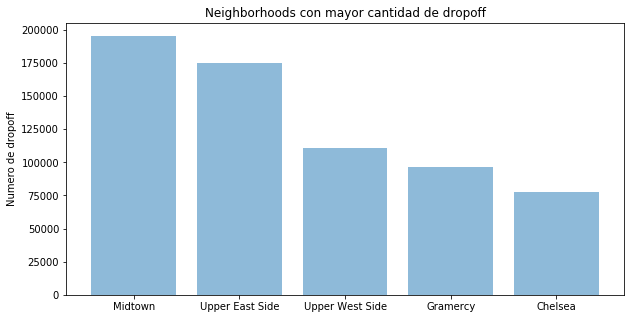

In [133]:
top_cities_pickup_index = list(groups_dropoff_neighborhood.index)
top_cities_pickup_values = np.concatenate( groups_dropoff_neighborhood.values, axis=0).tolist()
top_cities_pickup_index = top_cities_pickup_index[:5]
top_cities_pickup_values = top_cities_pickup_values[:5]
x = np.arange(len(top_cities_pickup_index))
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(x, top_cities_pickup_values, align='center', alpha=0.5)
plt.xticks(x, top_cities_pickup_index)
plt.ylabel('Numero de dropoff')
plt.title('Neighborhoods con mayor cantidad de dropoff')
plt.show()

# Escogiendo el Neighborhood con mayor cantidad de pickups, en que parte son normalmente sus dropoffs?

In [78]:
best = top_cities_pickup_index[0]
best_neighborhood_pickups = data_january[(data_january['pickup_neighborhood'] == best) & (data_january['dropoff_neighborhood'] != best)]

In [79]:
dropoff_best = best_neighborhood_pickups.groupby('dropoff_neighborhood').agg({'dummy': 'sum'})
dropoff_best.sort_values('dummy', ascending=False, inplace=True)

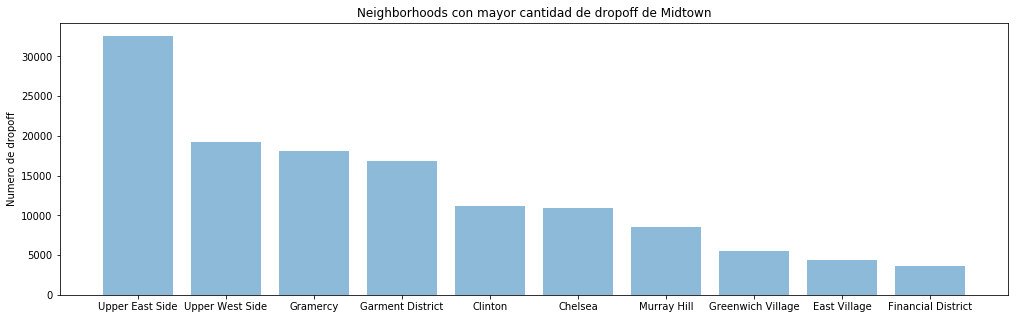

In [85]:
top_cities_pickup_index = list(dropoff_best.index)
top_cities_pickup_values = np.concatenate( dropoff_best.values, axis=0).tolist()
top_cities_pickup_index = top_cities_pickup_index[:10]
top_cities_pickup_values = top_cities_pickup_values[:10]
x = np.arange(len(top_cities_pickup_index))
%matplotlib inline
plt.figure(figsize=(17,5))
plt.bar(x, top_cities_pickup_values, align='center', alpha=0.5)
plt.xticks(x, top_cities_pickup_index)
plt.ylabel('Numero de dropoff')
plt.title('Neighborhoods con mayor cantidad de dropoff de ' + best)
plt.show()

# Pickups de zonas por rango de horario(dia, tarde noche)

referencia rangos dia https://www.timeanddate.com/sun/usa/new-york?month=1&year=2016

dia = desde __Sunrise__ hasta __Sunset__ (07:19 a 16:39)
 
tarde = end de __Sunset__	hasta end de __Astronomical Twilight__ (16:40 a 18:17)

noche = end de __Astronomical Twilight__ y comienzo de __Astronomical Twilight__ (18:18 a 07:18)

In [209]:
dia = data_january['pickup_datetime'][0].replace(year = 2016, month = 1,hour=7, minute=19, second=0, microsecond=0)
fin_dia = data_january['pickup_datetime'][0].replace(year = 2016, month = 1,hour=16, minute=39, second=0, microsecond=0)
fin_tarde = data_january['pickup_datetime'][0].replace(year = 2016, month = 1,hour=18, minute=17, second=0, microsecond=0)
fin_noche = data_january['pickup_datetime'][0].replace(year = 2016, month = 1,hour=7, minute=18, second=0, microsecond=0)
media_noche = data_january['pickup_datetime'][0].replace(year = 2016, month = 1,hour=23, minute=59, second=0, microsecond=0)
media_noche_d = data_january['pickup_datetime'][0].replace(year = 2016, month = 1,hour=0, minute=1, second=0, microsecond=0)

In [225]:
bina = [dia, fin_dia,fin_tarde]
dia_data = pd.cut(data_january['pickup_datetime'], bins=bina, labels=['dia','tarde'])
bina = [fin_dia, fin_tarde]
tarde_data = pd.cut(data_january['pickup_datetime'], bins=bina, labels=['tarde'])
bina = [fin_tarde,media_noche]
noche_data = pd.cut(data_january['pickup_datetime'], bins=bina, labels=['noche'])
bina = [media_noche_d,fin_noche]
noche2_data = pd.cut(data_january['pickup_datetime'], bins=bina, labels=['noche'])

0 = dia

1 = tarde 

2 = noche

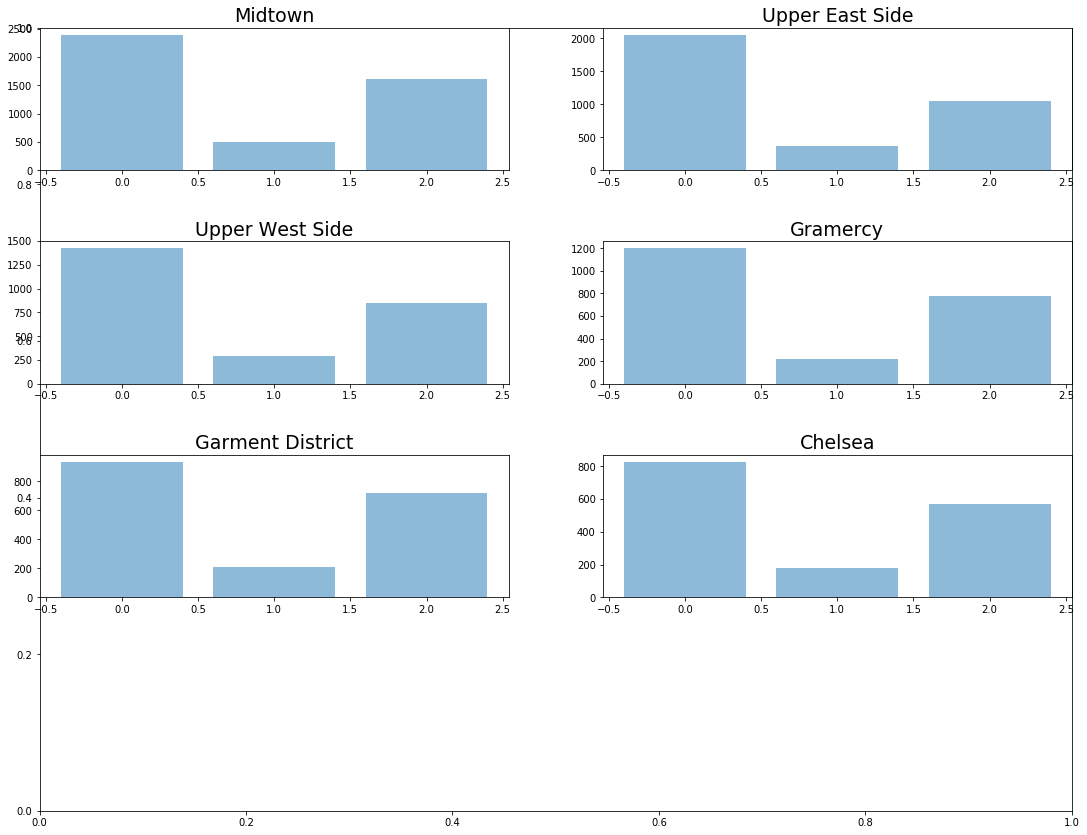

In [300]:
day = data_january.index.isin(dia_data.dropna().index.values)
day_dropoff = data_january[day].groupby('pickup_neighborhood').agg({'dummy': 'sum'})
day_dropoff.sort_values('dummy', ascending=False, inplace=True)
tarde = data_january.index.isin(tarde_data.dropna().index.values)
tarde_dropoff = data_january[tarde].groupby('pickup_neighborhood').agg({'dummy': 'sum'})
tarde_dropoff.sort_values('dummy', ascending=False, inplace=True)
noche = data_january.index.isin(noche_data.dropna().index.values)
noche_dropoff = data_january[noche].groupby('pickup_neighborhood').agg({'dummy': 'sum'})
noche_dropoff.sort_values('dummy', ascending=False, inplace=True)
# %matplotlib inline
fig, ax = plt.subplots()
fig.subplots_adjust(top=0.85)
plt.figure(figsize=(17,5))
fig.set_size_inches(18.5, 15)
fig.subplots_adjust(hspace=.5)
for a in range(0,6):
    x = np.arange(len(['dia', 'tarde', 'noche']))
    val = a+1
    neitgh = day_dropoff.index.values[a]
    axis1 = fig.add_subplot(4,2,a+1)
#     ax.set_xticks(x)
#     axis1.set_xticklabels(['dia', 'tarde', 'noche'])
    valores = [np.concatenate(day_dropoff.values, axis=0)[:val].tolist()[a],np.concatenate(tarde_dropoff.values, axis=0)[:val].tolist()[a],np.concatenate(noche_dropoff.values, axis=0)[:val].tolist()[a]]
    axis1.bar(x, valores, align='center', alpha=0.5)
    axis1.set_title(neitgh, fontsize=19)

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type,pickup_neighborhood,dropoff_neighborhood,dummy
14661,2016-01-01 07:19:04,40.75076,-73.99059,5.60,1.0,2016-01-01 07:33:49,40.76509,-73.93902,17.5,0.00,0.8,0.00,18.30,2.0,Garment District,Astoria-Long Island City,1
14662,2016-01-01 07:19:07,40.81980,-73.93862,10.16,2.0,2016-01-01 07:45:08,40.72207,-73.98912,30.5,0.00,0.8,0.00,31.30,2.0,Harlem,Lower East Side,1
14663,2016-01-01 07:19:19,40.72686,-73.98901,1.44,3.0,2016-01-01 07:26:28,40.73963,-73.99998,7.5,0.00,0.8,0.00,8.30,2.0,East Village,Chelsea,1
14664,2016-01-01 07:19:22,40.71165,-73.96630,2.70,1.0,2016-01-01 07:30:21,40.68961,-73.92815,10.5,0.00,0.8,2.25,13.55,1.0,Williamsburg,Bedford-Stuyvesant,1
14665,2016-01-01 07:19:25,40.76474,-73.99558,11.24,2.0,2016-01-01 07:49:43,40.66990,-73.97896,34.5,0.00,0.8,0.00,35.30,2.0,Clinton,Park Slope,1
14666,2016-01-01 07:19:33,40.76664,-73.99644,0.11,1.0,2016-01-01 07:21:24,40.76662,-73.99422,3.0,0.00,0.8,0.00,3.80,2.0,Midtown,Midtown,1
14667,2016-01-01 07:19:43,40.77758,-73.94604,1.06,1.0,2016-01-01 07:23:07,40.76409,-73.95577,5.5,0.00,0.8,0.63,6.93,1.0,Upper East Side,Upper East Side,1
14668,2016-01-01 07:19:46,40.71265,-73.95868,3.02,2.0,2016-01-01 07:30:30,40.71422,-73.98726,11.5,0.00,0.8,0.00,12.30,2.0,Williamsburg,Lower East Side,1
14669,2016-01-01 07:19:53,40.75093,-73.97443,1.66,2.0,2016-01-01 07:27:49,40.75049,-73.99529,8.0,0.00,0.8,0.00,8.80,2.0,Murray Hill,Chelsea,1
14670,2016-01-01 07:19:56,40.73383,-74.00274,6.90,1.0,2016-01-01 07:35:42,40.81755,-73.96089,22.0,0.00,0.8,0.00,22.80,2.0,Greenwich Village,Morningside Heights,1


In [148]:
from datetime import datetime

In [146]:
data_january['pickup_datetime'][0]
a = data_january['pickup_datetime'][0].replace(year = 2016, month = 1,hour=8, minute=0, second=0, microsecond=0)
a

Timestamp('2016-01-01 08:00:00')